In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os



In [21]:
# Set parameters
img_size = 224  # MobileNet expects 224x224 images
batch_size = 32
epochs =15
num_classes = 3  # Update this based on your number of classes

# Set directory for training and validation datasets
train_dir = r"E:\Dataset 2\Train"
val_dir = r"E:\Dataset 2\Validation"


In [22]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 1128 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


In [23]:
# Load MobileNetV2 model pre-trained on ImageNet, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer



In [24]:
# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base MobileNetV2 layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Unfreeze some layers and fine-tune the model if needed
# for layer in base_model.layers:
#     layer.trainable = True
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_generator, validation_data=val_generator, epochs=epochs)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.5538 - loss: 1.7042 - val_accuracy: 0.7500 - val_loss: 0.5763
Epoch 2/15
 1/35 ━━━━━━━━━━━━━━━━━━━━ 16s 494ms/step - accuracy: 0.7500 - loss: 0.5624

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.7500 - loss: 0.5624 - val_accuracy: 0.7407 - val_loss: 0.6726
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.8179 - loss: 0.4651 - val_accuracy: 0.7578 - val_loss: 0.5820
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8750 - loss: 0.2677 - val_accuracy: 0.7778 - val_loss: 0.4894
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.8106 - loss: 0.4502 - val_accuracy: 0.7695 - val_loss: 0.5237
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9062 - loss: 0.2871 - val_accuracy: 0.7407 - val_loss: 0.4805
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.8633 - loss: 0.3724 - val_accuracy: 0.8125 - val_loss: 0.4612
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.8750 - loss: 0.3121 - val_accuracy: 0.8889 - val_loss: 0.3547
Epoch 9/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.8864 - loss: 0.3118 - val_accuracy: 0.6250 - val_loss: 0

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 226s 7s/step - accuracy: 0.8858 - loss: 0.2566 - val_accuracy: 0.8086 - val_loss: 0.5259
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9375 - loss: 0.1489 - val_accuracy: 0.7778 - val_loss: 0.5996
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 230s 7s/step - accuracy: 0.8973 - loss: 0.2576 - val_accuracy: 0.8477 - val_loss: 0.3798
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9062 - loss: 0.2373 - val_accuracy: 0.8148 - val_loss: 0.4121
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.9472 - loss: 0.1834 - val_accuracy: 0.8320 - val_loss: 0.4747
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9375 - loss: 0.1090 - val_accuracy: 0.8889 - val_loss: 0.2576
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.9323 - loss: 0.1836 - val_accuracy: 0.8320 - val_loss: 0.4166
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9688 - loss: 0.0807 - val_accuracy: 0.8148 - v

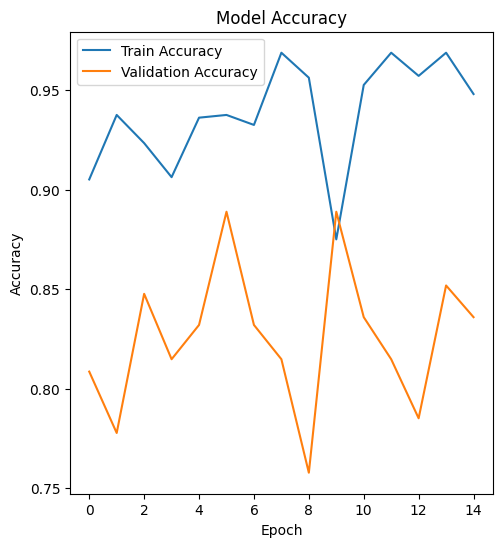

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)
import matplotlib.pyplot as plt
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

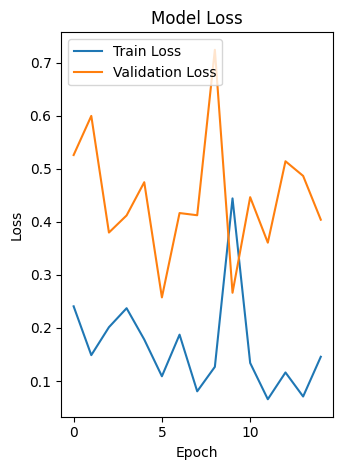

In [26]:
# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()